In [3]:
import numpy as np
import matplotlib.pyplot as plt

barn = 1e-28 # m2
fbarn = 1e-15*barn # m2
fbarn = fbarn * 1e4 # cm2

# DUNE XSecs

In [4]:
teg_xsec = np.genfromtxt("teg_epem_bsm_dune.txt", delimiter="   ", skip_header=7)
xsec, err = teg_xsec[:, 1], teg_xsec[:, 2]

sm_teg = xsec[0]
sm_uncert = err[0]

bsm_xsec = xsec[1:]
bsm_uncert = err[1:]

masses = np.logspace(-3, 1, 21) # GeV
masses = masses[:len(bsm_xsec)]  # Match lengths

ratio = bsm_xsec / sm_teg
ratio_uncert = ratio * np.sqrt((bsm_uncert / bsm_xsec)**2 + (sm_uncert / sm_teg)**2)

ValueError: x and y must have same first dimension, but have shapes (21,) and (30,)

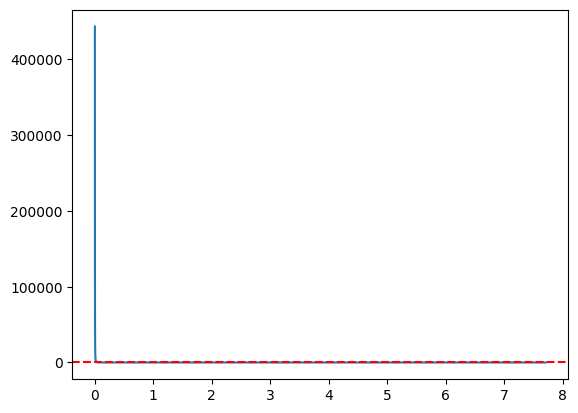

In [5]:
hostert_ratio = np.genfromtxt("hostert_le_lmu_xsec_ratio.csv", delimiter=",")  # sigma/sigma_SM (DUNE flux integrated)
mZ_values = hostert_ratio[:, 0]
ratio_values = hostert_ratio[:, 1]
plt.plot(mZ_values, ratio_values, marker='', label='Total XSec (Hostert et al.)')
plt.axhline(y=1, color='r', linestyle='--', label='SM Prediction')

plt.plot(masses, ratio, marker='', lw=1.5, label="TEG Z' XSec")
plt.fill_between(masses, ratio - ratio_uncert, ratio + ratio_uncert, color='gray', alpha=0.5, label='Uncertainty')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('mZ\' (GeV)')
plt.ylabel('Cross Section Ratio (BSM/SM)')
plt.legend(title=r'$g\prime=8\times10^{-4}$', ncols=2)
plt.title(r'DUNE ND (62.4 GeV), $\nu_\mu\rightarrow\nu_\mu e^+ e^-$')
plt.show()

# Neutrino Energy XSecs

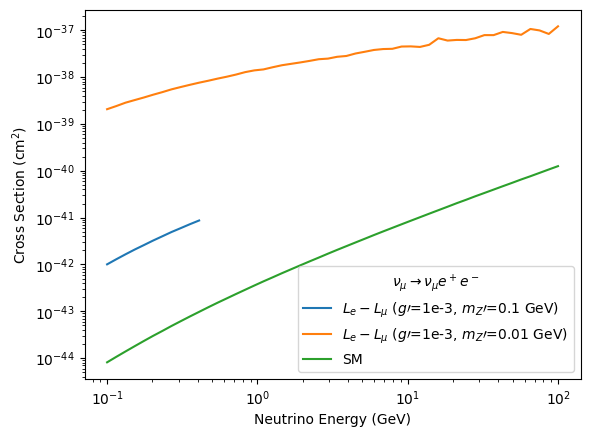

In [17]:
teg_xsec = np.genfromtxt("lelmu_0.001_0.1_epem.txt", delimiter="   ", skip_header=7)
le_lmu_E, le_lmu_xsec, err = teg_xsec[:, 0], teg_xsec[:, 1], teg_xsec[:, 2]
le_lmu_xsec *= fbarn  # Convert to cm^2
plt.plot(le_lmu_E, le_lmu_xsec, marker='', lw=1.5, label=r"$L_e - L_\mu$ ($g\prime$=1e-3, $m_Z\prime$=0.1 GeV)")

teg_xsec = np.genfromtxt("lelmu_0.001_0.01_epem.txt", delimiter="   ", skip_header=7)
le_lmu_E, le_lmu_xsec, err = teg_xsec[:, 0], teg_xsec[:, 1], teg_xsec[:, 2]
le_lmu_xsec *= fbarn  # Convert to cm^2
plt.plot(le_lmu_E, le_lmu_xsec, marker='', lw=1.5, label=r"$L_e - L_\mu$ ($g\prime$=1e-3, $m_Z\prime$=0.01 GeV)")

sm_E, sm_xsec, sm_err = np.genfromtxt("../data/xsecs/numu_numu_e_e.txt", delimiter="   ", skip_header=7).T
sm_xsec *= fbarn  # Convert to cm^2
plt.plot(sm_E, sm_xsec, marker='', lw=1.5, label='SM')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel('Cross Section (cm$^2$)')
plt.legend(title=r'$\nu_\mu\rightarrow\nu_\mu e^+ e^-$')
plt.show()